In [37]:
using DelimitedFiles, Plots
include("toArraysSecUp.jl")
@info PATHOUT
@info PATHIN
filesIn = readdir(PATHIN)

┌ Info: Secretion and Uptake are stored by CC3D as x,y,z, value_at(x,y,z)
│ Hence, this script turns that into a vector of length 256^2, which only 
│ contains value_at(x,y,z)
└ @ Main /home/javier/Projects/DiffusionSimple/toArraysSecUp.jl:39
┌ Info: /raid/javier/Datasets/SimpleDiffusion/Data/
└ @ Main In[37]:3
┌ Info: /raid/javier/Datasets/SimpleDiffusion/DataOG/
└ @ Main In[37]:4


128-element Vector{String}:
 "Chemical1.dat"
 "Chemical10.dat"
 "Chemical11.dat"
 "Chemical12.dat"
 "Chemical13.dat"
 "Chemical14.dat"
 "Chemical15.dat"
 "Chemical16.dat"
 "Chemical17.dat"
 "Chemical18.dat"
 "Chemical19.dat"
 "Chemical2.dat"
 "Chemical20.dat"
 ⋮
 "Uptake28.dat"
 "Uptake29.dat"
 "Uptake3.dat"
 "Uptake30.dat"
 "Uptake31.dat"
 "Uptake32.dat"
 "Uptake4.dat"
 "Uptake5.dat"
 "Uptake6.dat"
 "Uptake7.dat"
 "Uptake8.dat"
 "Uptake9.dat"

In [38]:
ChemFieldFiles = filesIn[contains.(filesIn, "Chemical")]
ConvergenceErrorFiles = filesIn[contains.(filesIn, "ConvergenceError")]
SecretionFiles = filesIn[contains.(filesIn, "Secretion")]
UptakeFiles = filesIn[contains.(filesIn, "Uptake")];

In [39]:
s = 256
idx = 32
chemField = reshape(readdlm(PATHIN * ChemFieldFiles[idx]),s,s);
convergence = readdlm(PATHIN * ConvergenceErrorFiles[idx]);
secretion = makeField(readdlm(PATHIN * SecretionFiles[idx]));
uptake = makeField(readdlm(PATHIN * UptakeFiles[idx]));

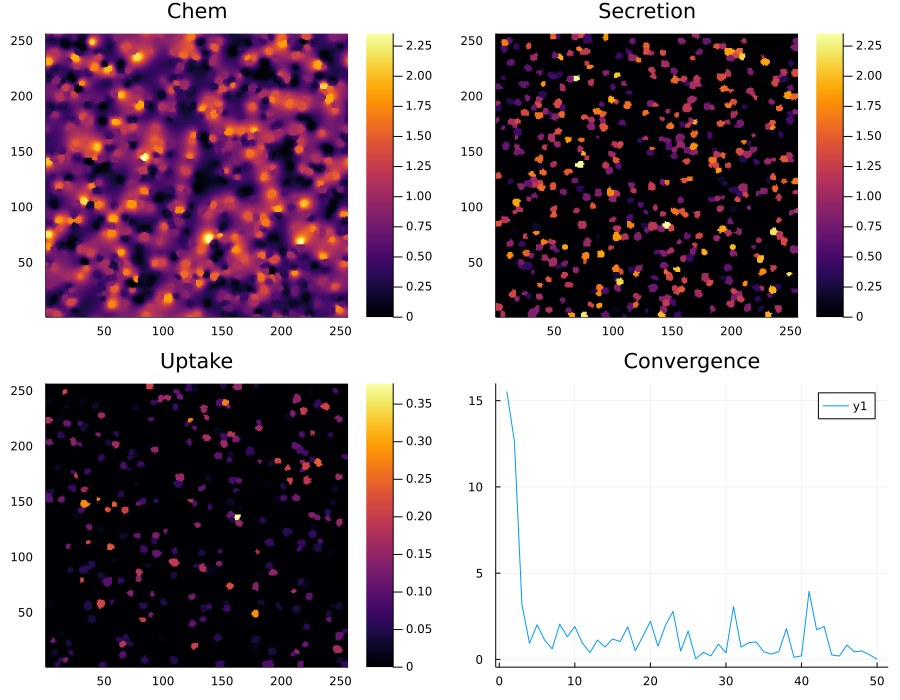

In [40]:
plot(heatmap(chemField, title="Chem"),heatmap(secretion, title="Secretion"),heatmap(uptake, title="Uptake"), 
    plot(convergence, title="Convergence"), size=(900,700))

In [19]:
filesOut = readdir(PATHOUT)

30-element Vector{String}:
 "Chemical0.dat"
 "Chemical1.dat"
 "Chemical2.dat"
 "Chemical3.dat"
 "Chemical4.dat"
 "Chemical5.dat"
 "Chemical6.dat"
 "Chemical7.dat"
 "Chemical8.dat"
 "Chemical9.dat"
 "Secretion0.dat"
 "Secretion1.dat"
 "Secretion2.dat"
 ⋮
 "Secretion8.dat"
 "Secretion9.dat"
 "Uptake0.dat"
 "Uptake1.dat"
 "Uptake2.dat"
 "Uptake3.dat"
 "Uptake4.dat"
 "Uptake5.dat"
 "Uptake6.dat"
 "Uptake7.dat"
 "Uptake8.dat"
 "Uptake9.dat"

In [20]:
ChemFieldFiles2 = filesOut[contains.(filesOut, "Chemical")]
ConvergenceErrorFiles2 = filesOut[contains.(filesOut, "ConvergenceError")]
SecretionFiles2 = filesOut[contains.(filesOut, "Secretion")]
UptakeFiles2 = filesOut[contains.(filesOut, "Uptake")];

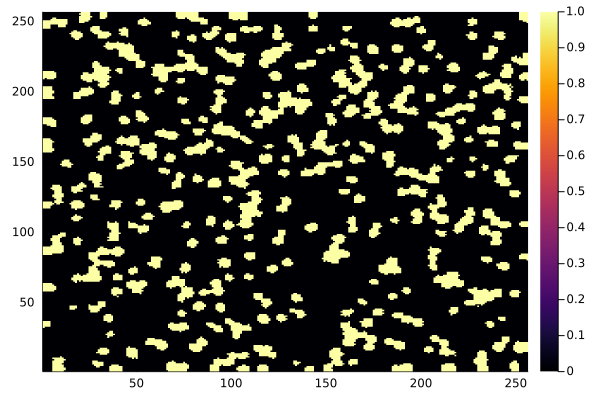

In [21]:
heatmap(makeField(readdlm(PATHIN * SecretionFiles[1])))

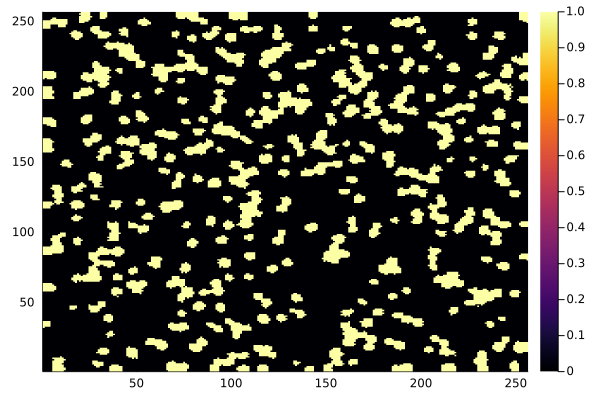

In [22]:
heatmap(reshape(readdlm(PATHOUT * SecretionFiles2[1]),s,s))

In [12]:
# - Can we plot error -- perhaps as a function of GT value in bins from 0 to maximum (~3)
using DelimitedFiles
using Plots

In [4]:
PATH = "/home/javier/Projects/DiffusionSimple/Results/AfterPlots/Pred"

"/home/javier/Projects/DiffusionSimple/Results/AfterPlots/Pred"

In [23]:
filenames = readdir(PATH, join=true)
filenames = filenames[contains.(filenames, ".txt")]
filenames = filenames[contains.(filenames, "_3_DS-Data.txt")]

9-element Vector{String}:
 "/home/javier/Projects/Diffusion" ⋯ 34 bytes ⋯ "el-modelLeakyUNet_3_DS-Data.txt"
 "/home/javier/Projects/Diffusion" ⋯ 36 bytes ⋯ "-modelSimpleCNN-L_3_DS-Data.txt"
 "/home/javier/Projects/Diffusion" ⋯ 36 bytes ⋯ "-modelSimpleCNN-S_3_DS-Data.txt"
 "/home/javier/Projects/Diffusion" ⋯ 37 bytes ⋯ "modelSimpleCNNCat_3_DS-Data.txt"
 "/home/javier/Projects/Diffusion" ⋯ 39 bytes ⋯ "delSimpleCNNConvT_3_DS-Data.txt"
 "/home/javier/Projects/Diffusion" ⋯ 39 bytes ⋯ "delSimpleCNNJules_3_DS-Data.txt"
 "/home/javier/Projects/Diffusion" ⋯ 41 bytes ⋯ "lSimpleCNNReflect_3_DS-Data.txt"
 "/home/javier/Projects/Diffusion" ⋯ 29 bytes ⋯ "d/Model-modelUNet_3_DS-Data.txt"
 "/home/javier/Projects/Diffusion" ⋯ 25 bytes ⋯ "/Pred/Model-model_3_DS-Data.txt"

In [255]:
ergrid = readdlm(filenames[1]);
filenames[end-1]

"/home/javier/Projects/DiffusionSimple/Results/AfterPlots/Pred/Model-modelUNet_3_DS-Data.txt"

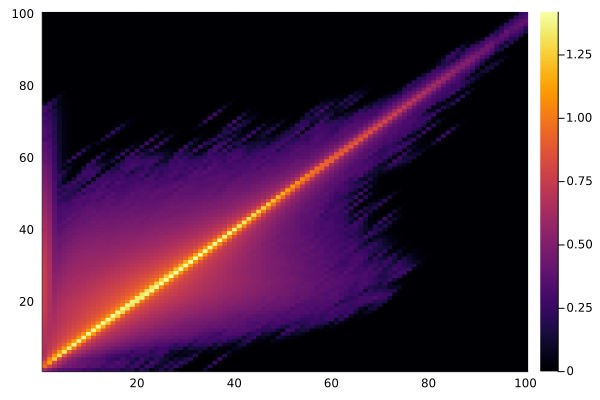

In [258]:
heatmap(ergrid .^ (1/8))

In [87]:
using ImageTransformations, TestImages, CoordinateTransformations, Rotations, Images

In [177]:
# img = testimage("camera");

# # define transformation
# trfm = recenter(RotMatrix(pi/8), (256,256));
# imgw = warp(img, trfm);

In [231]:
size(ergrid)

(100, 100)

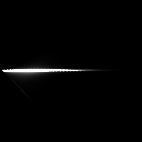

In [267]:
ergridImg = colorview(Gray, ergrid .^ (1/1))
trfm = recenter(RotMatrix(-pi/4+0.01), (50,50));
imgw = warp(ergridImg, trfm);
imgw;
ar = channelview(imgw);

imgw

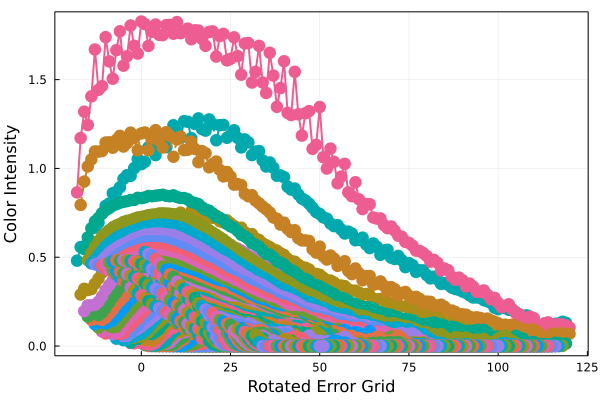

In [262]:
plot([ar[begin+i,:] for i in 0:1:size(ar,1)-1], legend=false,
    frame=:box, ms=7, s=:auto, markershapes = :circle, lw=2, markerstrokewidth=0.0, 
    xlabel="Rotated Error Grid", ylabel="Color Intensity")


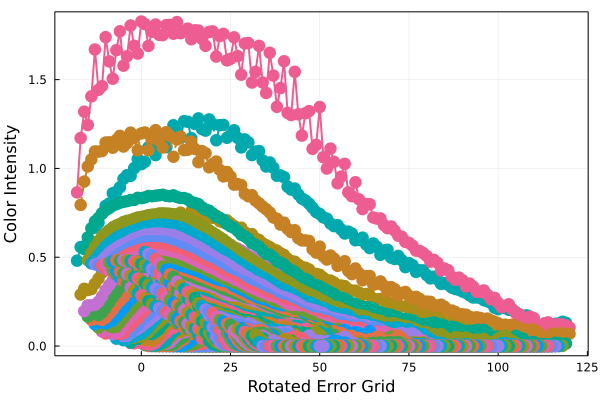

In [263]:
plot([ar[begin+i,:] for i in 0:1:size(ar,1)-1], legend=false,
    frame=:box, ms=7, s=:auto, markershapes = :circle, lw=2, markerstrokewidth=0.0, 
    xlabel="Rotated Error Grid", ylabel="Color Intensity")

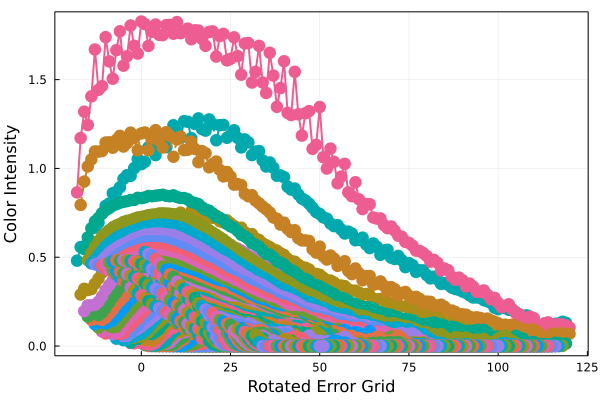

In [264]:
plot([ar[begin+i,:] for i in 0:1:size(ar,1)-1], legend=false,
    frame=:box, ms=7, s=:auto, markershapes = :circle, lw=2, markerstrokewidth=0.0, 
    xlabel="Rotated Error Grid", ylabel="Color Intensity")

In [239]:
#

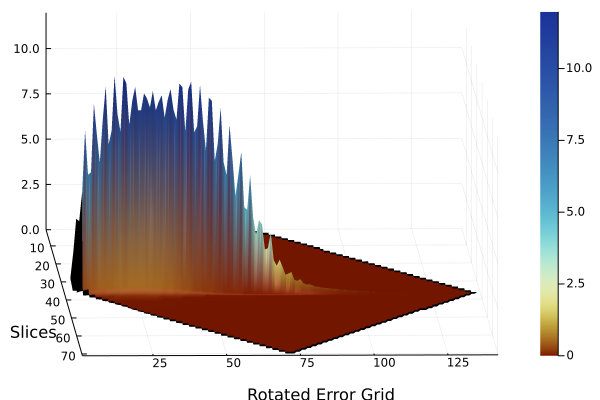

In [270]:
# surface([ar[begin+i,:] for i in 0:1:size(ar,1)-1], ylabel="Sources Tested on", xlabel="Sources Trained on", camera=(0,0), c=cgrad(:roma, scale = :exp))  #camera=(0,0)
surface(hcat([ar[begin+i,:] for i in 0:2:size(ar,1)-1]...), ylabel="Rotated Error Grid", xlabel="Slices", 
        c=cgrad(:roma, scale = :exp), camera=(85,45))
